<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=8>Fundamentals of AIML</center></font></h1>
<h1><center>Cardio Good Fitness Project</center></h1>
<h3><center>Charlcye Mitchell, September 2022</center></h3>

# Objective
- Explore and visualize the dataset
- Build a linear regression model to predict the prices of used cars
- Generate a set of insights and recommendations that will help the business


# Data Dictionary
The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables:

* **Product** - The model no. of the treadmill
* **Age** -  Age of the customer in no of years
* **Gender** - Gender of the customer
* **Education** - Education of the customer in no. of years
* **Marital Status** - Marital status of the customer
* **Usage** - Avg. # times the customer wants to use the treadmill every week
* **Fitness** - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
* **Income** - Income of the customer
* **Miles** - Miles that a customer expects to run

## **Importing the necessary packages** 

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

# To supress numerical display in scientific notations to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x) 



## **Reading the datasets**

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read in the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CardioGoodFitness.csv")

## **Review the data of the customers of the Cardio Good Fitness retail store**

Let's start by performing basic steps to understand the data such as:
- observing the first few rows of the dataset
- getting information about the number of rows and columns 
- finding out the data types of the columns 
- checking the statistical summary 

### Displaying the first few rows of the dataset

In [ ]:
# Look at the first 5 rows of data
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


The dataset has been loaded properly
- *Dataset consists of several columns displaying the various customer attributes*
- *2/3 of the columns are numerical in nature*

### Understanding the shape of the user dataset

In [ ]:
# How many rows and columns are there?
df.shape

(180, 9)

- *The Dataset has 180 rows with 9 columns*

### Checking the datatype of the columns



In [ ]:
# Check data types and non-null value counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


- *There are 3 object datatype columns with 6 numerical datatypes*
- *All the columns have 180 observations, which means none of the columns have null values*



### Getting the statistical summary for the user dataset


We can now have a look at the statistical summary of the dataset.<br>

The **describe()** function will help us in finding out the statistical summary. **Include='all'** will show all data, not just numerical values. **.T** will transpose the data.<br>

The statistical summary will give us a overview of the numerical columns of the data and display various features like the minimum, maximum, mean, standard deviation, etc. of the columns. This will help us to understand the distribution of the values present in the numerical columns.

**Note**: 'nan' in numpy stands for not a number and it is used to denote the values that are undefined.

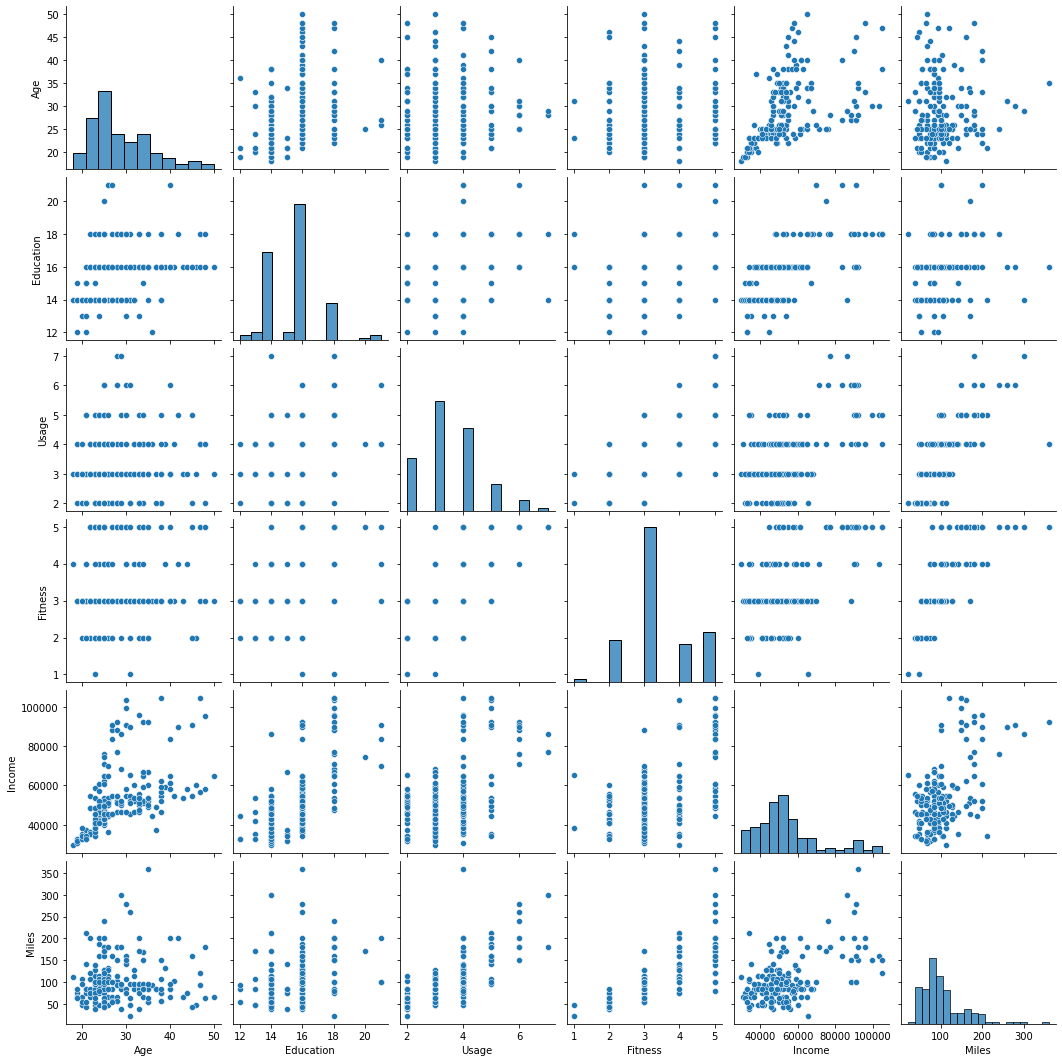

In [ ]:
sns.pairplot(df);

In [ ]:
# Review the statistical summary
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,TM195,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180.00,NaN,NaN,NaN,28.79,6.94,18.00,24.00,26.00,33.00,50.00
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180.00,NaN,NaN,NaN,15.57,1.62,12.00,14.00,16.00,16.00,21.00
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180.00,NaN,NaN,NaN,3.46,1.08,2.00,3.00,3.00,4.00,7.00
Fitness,180.00,NaN,NaN,NaN,3.31,0.96,1.00,3.00,3.00,4.00,5.00
Income,180.00,NaN,NaN,NaN,53719.58,16506.68,29562.00,44058.75,50596.50,58668.00,104581.00
Miles,180.00,NaN,NaN,NaN,103.19,51.86,21.00,66.00,94.00,114.75,360.00


- *There are 3 products*
- *Customers range from 18-50 years old, with 75% being under the age of 33*
- ❗Further exploration: What is the customer spread by decade of life?
- *Education ranges from 12-21 years*
- *Customers wish to use the product from 2-7x per week*
- *Customer fitness ranges from very unfit to very fit*
- *Customer income ranges from 29,562 to 104,581, with 75% earning less than 58,668*
- *Customers expect to run from 21-360 miles, with 75% planning to run less than 114 miles*

## **Explore Relationships Between Customer Attributes**

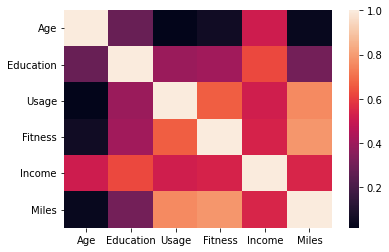

In [ ]:
sns.heatmap(data=df[['Age','Education','Usage','Fitness', 'Income', 'Miles']].corr());

- *How fit a person rates themselves, the number of miles they intend to run, and the days per week they intend to use the equipment are all strongly positively correlated*
- *There is a strong negative correlation between a person's age, and how fit they rate themselves, how many miles they intend to run, how many days per week they intend to use the equipment*
- *Income & Education are somewhat positively correlated*
- *CGF customers have a somewhat negative correlation between age and education level (interesting)*
- *There is a somewhat negative correlation between education and how fit a person rates themselves, the number of miles they intend to run, and the days per week they intend to use the equipment*
- ❗For further exploration: Is there a Gender:Income correlation?

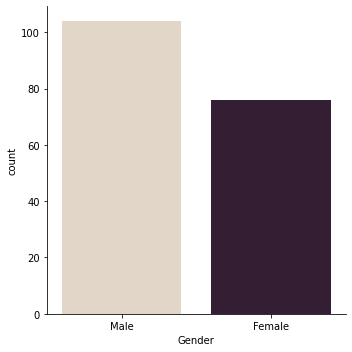

In [ ]:
sns.catplot(data=df, x="Gender", kind="count", palette="ch:.25");


- *CGF has ~20% more male customers than female customers*

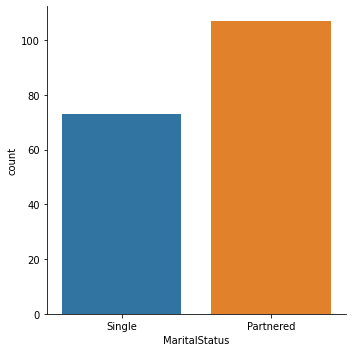

In [ ]:
sns.catplot(data=df, x="MaritalStatus", kind="count", palette= "tab10");

- *CGF has ~25% more partnered customers than single customers*
-❗For further exploration: Do partnered customers plan to run more miles than single customers?

**Univariate Analysis of Customers Per Product**


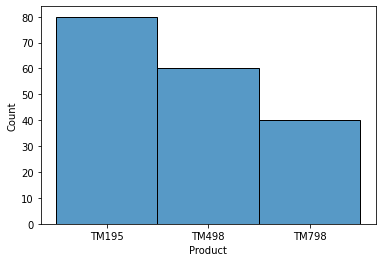

In [ ]:
# View overall popularity of product within this dataset
sns.histplot(data = df, x='Product', bins=6);

- *The 3 products are TM195, TM498, and TM798 with around 80, 60, and 40 customers respectively*

### Statistical Analysis of TM195 Customers

In [ ]:
df[df.Product == 'TM195'].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,80,1,TM195,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,80.00,NaN,NaN,NaN,28.55,7.22,18.00,23.00,26.00,33.00,50.00
Gender,80,2,Male,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,80.00,NaN,NaN,NaN,15.04,1.22,12.00,14.00,16.00,16.00,18.00
MaritalStatus,80,2,Partnered,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,80.00,NaN,NaN,NaN,3.09,0.78,2.00,3.00,3.00,4.00,5.00
Fitness,80.00,NaN,NaN,NaN,2.96,0.66,1.00,3.00,3.00,3.00,5.00
Income,80.00,NaN,NaN,NaN,46418.03,9075.78,29562.00,38658.00,46617.00,53439.00,68220.00
Miles,80.00,NaN,NaN,NaN,82.79,28.87,38.00,66.00,85.00,94.00,188.00


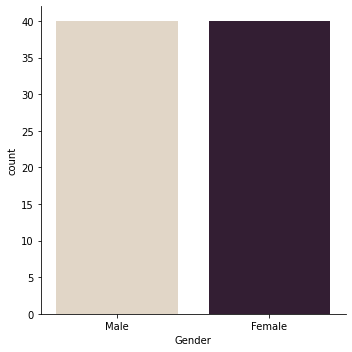

In [ ]:
sns.catplot(data=df[df.Product == 'TM195'], x="Gender", kind="count", palette="ch:.25");

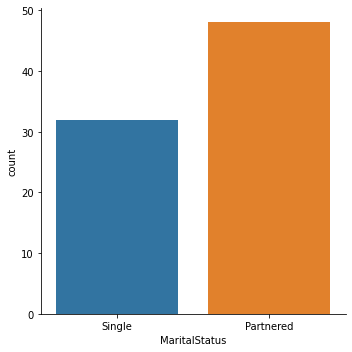

In [ ]:
sns.catplot(data=df[df.Product == 'TM195'], x="MaritalStatus", kind="count", palette= "tab10");

- *TM195 customers range from 18-50 years old*
- *Education ranges from 12-18 years*
- *Customers wish to use the product from 2-5x per week*
- *Customer fitness ranges from very unfit to very fit*
- *Customer income ranges from 29,562 to 68,220 - the lower end of the pay range for Cardio Good Fitness customers*
- *Customers expect to run from 38-188 miles*
- *Both genders are equally represented*
- *Like all CGF products, the customer profile is more Partnered than Single*

### Statistical Analysis of TM498 Customers


In [ ]:
df[df.Product == 'TM498'].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,60,1,TM498,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,60.00,NaN,NaN,NaN,28.90,6.65,19.00,24.00,26.00,33.25,48.00
Gender,60,2,Male,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,60.00,NaN,NaN,NaN,15.12,1.22,12.00,14.00,16.00,16.00,18.00
MaritalStatus,60,2,Partnered,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,60.00,NaN,NaN,NaN,3.07,0.80,2.00,3.00,3.00,3.25,5.00
Fitness,60.00,NaN,NaN,NaN,2.90,0.63,1.00,3.00,3.00,3.00,4.00
Income,60.00,NaN,NaN,NaN,48973.65,8653.99,31836.00,44911.50,49459.50,53439.00,67083.00
Miles,60.00,NaN,NaN,NaN,87.93,33.26,21.00,64.00,85.00,106.00,212.00


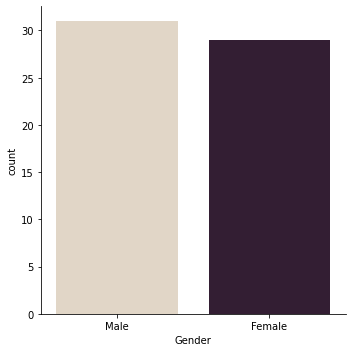

In [ ]:
sns.catplot(data=df[df.Product == 'TM498'], x="Gender", kind="count", palette="ch:.25");

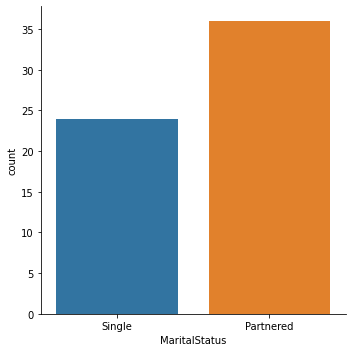

In [ ]:
sns.catplot(data=df[df.Product == 'TM498'], x="MaritalStatus", kind="count", palette= "tab10");

- *Customers range from 19-48 years old*
- *Education ranges from 12-18 years*
- *Customers wish to use the product from 2-5x per week*
- *Customer fitness ranges from very unfit to somewhat fit*
- *Customer income ranges from 31,836 to 67,083 - low-mid range for CGF customers*
- *Customers expect to run from 21-212 miles*
- *Both genders are almost equally represented, with slightly more male customers*
- *Like all CGF products, the customer profile is more Partnered than Single*

### Statistical Analysis of TM798 Customers


In [ ]:
df[df.Product == 'TM798'].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,40,1,TM798,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,40.00,NaN,NaN,NaN,29.10,6.97,22.00,24.75,27.00,30.25,48.00
Gender,40,2,Male,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,40.00,NaN,NaN,NaN,17.32,1.64,14.00,16.00,18.00,18.00,21.00
MaritalStatus,40,2,Partnered,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,40.00,NaN,NaN,NaN,4.78,0.95,3.00,4.00,5.00,5.00,7.00
Fitness,40.00,NaN,NaN,NaN,4.62,0.67,3.00,4.00,5.00,5.00,5.00
Income,40.00,NaN,NaN,NaN,75441.57,18505.84,48556.00,58204.75,76568.50,90886.00,104581.00
Miles,40.00,NaN,NaN,NaN,166.90,60.07,80.00,120.00,160.00,200.00,360.00


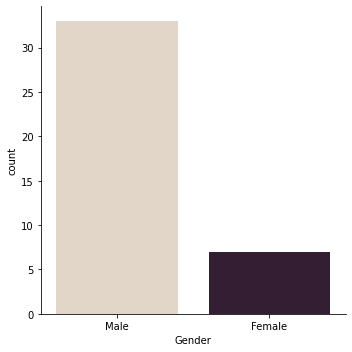

In [ ]:
sns.catplot(data=df[df.Product == 'TM798'], x="Gender", kind="count", palette="ch:.25");

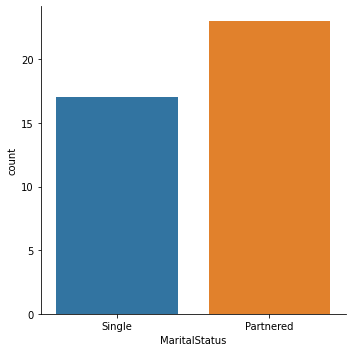

In [ ]:
sns.catplot(data=df[df.Product == 'TM798'], x="MaritalStatus", kind="count", palette= "tab10");

- *Customers range from 22-48 years old*
- *Education ranges from 14-21 years*
- *Customers wish to use the product from 3-7x per week*
- *Customer fitness ranges from fit to very fit*
- *Customer income ranges from 48,556 to 104,581 - high end range of CGF customer incomes*
- *Customers expect to run from 80-360 miles (there is an outlier here, as the mean is 166 and the median is 160)*
- *There are signifigantly more male customers than female customers using the TM798*
- *Like all CGF products, the customer profile is more Partnered than Single*

## **Customer Differences Per Product**



### Income

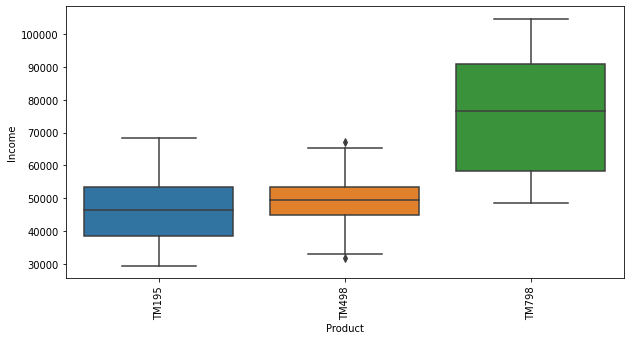

In [ ]:
# What is the customer's income range for each product?
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='Product',y='Income',showfliers=True) # turning on outliers
plt.xticks(rotation=90)
plt.show()



*   Higher income customers purchase the TM798
*   Lower income customers purchase the TM195



### Education

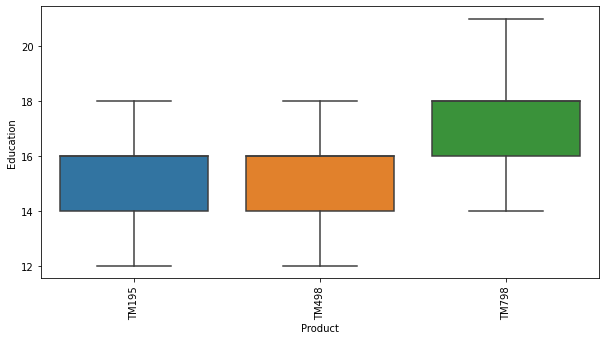

In [ ]:
# What is the customer's education range for each product?
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='Product',y='Education',showfliers=False) # turning off outliers
plt.xticks(rotation=90)
plt.show()



*   Customers with higher education purchase the TM798
*   Lower income customers purchase the TM195 or TM498 equally



### Age

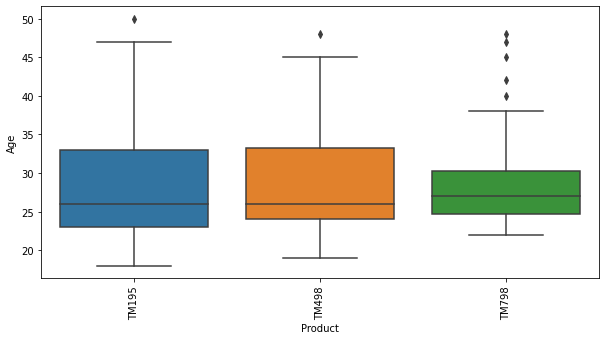

In [ ]:
# What is the customer's age range for each product?
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='Product',y='Age',showfliers=True) # turning on outliers
plt.xticks(rotation=90)
plt.show()



*   The youngest customers purchase the TM195.
*   The most interested demographic is in their mid 20's to mid 30's.



### Intended Usage (Days Per Week)

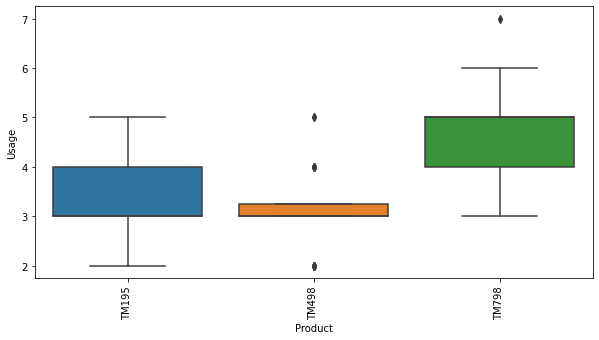

In [ ]:
# What is the customer's intended amount of usage (days per week) for each product?
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='Product',y='Usage',showfliers=True) # turning on outliers
plt.xticks(rotation=90)
plt.show()



*   The TM195 seems to appeal to all types of runner frequencies.  Maybe this is a good, affordable, generic piece of equipment.
*   The TM498 appeals mostly to people who only want to run a few days per week. Maybe this is a good model with some training features for beginners.
*   The TM798 appeals to people who intend to run many days per week. Maybe this equipment contains some features valuable to consistent runners.


### Fitness Level

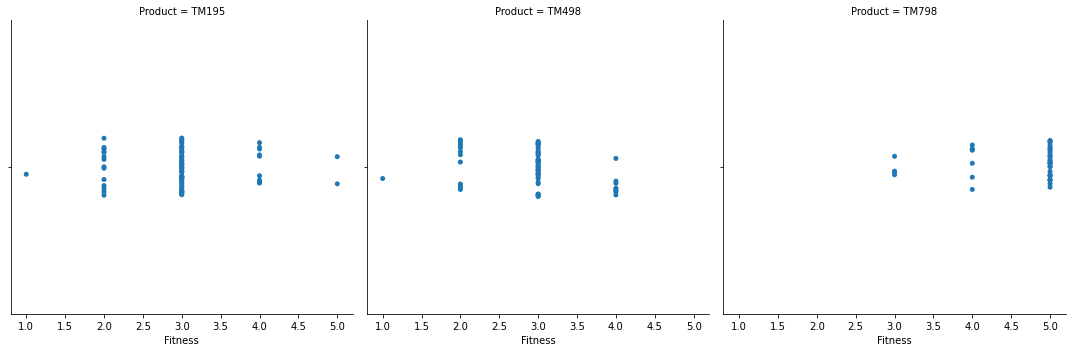

In [ ]:
# What is the customer's self-disclosed fitness range for each product?
sns.catplot(x='Fitness',
            col='Product', 
            data=df)
plt.show()

### Intended Mileage

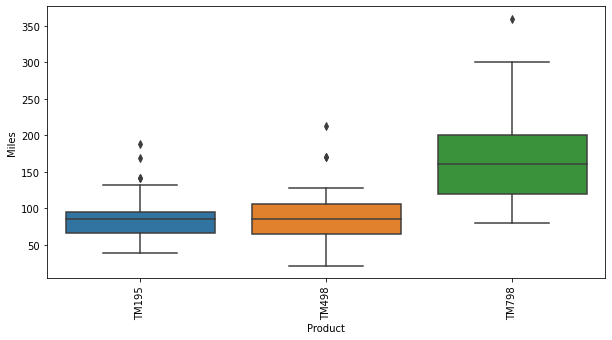

In [ ]:
# What is the customer's intended mileage range for each product?
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='Product',y='Miles',showfliers=True) # turning on outliers
plt.xticks(rotation=90)
plt.show()

# **Customer Profiles**

## **TM195 Existing Customer Profile**

- *TM195 customers range from 18-50 years old*
- *Education ranges from 12-18 years*
- *Customers wish to use the product from 2-5x per week*
- *Customer fitness ranges from very unfit to very fit*
- *Customer income ranges from 29,562 to 68,220 - the lower end of the pay range for Cardio Good Fitness customers*
- *Customers expect to run from 38-188 miles*
- *Both genders are equally represented*
- *Like all CGF products, the customer profile is more Partnered than Single*

## **TM498 Existing Customer Profile**

- *Customers range from 19-48 years old*
- *Education ranges from 12-18 years*
- *Customers wish to use the product from 2-5x per week*
- *Customer fitness ranges from very unfit to somewhat fit*
- *Customer income ranges from 31,836 to 67,083 - low-mid range for CGF customers*
- *Customers expect to run from 21-212 miles*
- *Both genders are almost equally represented, with slightly more male customers*
- *Like all CGF products, the customer profile is more Partnered than Single*

## **TM798 Existing Customer Profile**

- *Customers range from 22-48 years old*
- *Education ranges from 14-21 years*
- *Customers wish to use the product from 3-7x per week*
- *Customer fitness ranges from fit to very fit*
- *Customer income ranges from 48,556 to 104,581 - high end range of CGF customer incomes*
- *Customers expect to run from 80-360 miles (there is an outlier here, as the mean is 166 and the median is 160)*
- *There are signifigantly more male customers than female customers using the TM798*
- *Like all CGF products, the customer profile is more Partnered than Single*

# **Actionable Insights and Recommendations for Targeting New Customers**

#### **Insights**

We analyzed a dataset of 180 customers who purchased 1 of 3 products from the Cardio Good Fitness store.
The main feature of interest here is the demographics of the customers. 
By understanding more about which products different demographics are interested in, we can improve our targeted messaging to those demographics.

We have been able to conclude that:  

1.   Higher income customers purchase the TM798 while lower income customers purchase the TM195.
2.   Customers with higher education purchase the TM798 while lower income customers purchase the TM195 or TM498 equally
3.   The youngest customers purchase the TM195.
4.   The most interested demographic is in their mid 20's to mid 30's.
5.    The TM195 appeals to all types of runner frequencies. The TM498 appeals mostly to people who only want to run a few days per week. The TM798 appeals to people who intend to run many days per week.

#### **Recommendations to business**

1. Invest in targeted advertising for the TM195 to value-market customers between 25-35 and young adults.
2. Invest in targeted advertising for the TM498 to people aged 25-35 who are beginning their fitness journeys.
3. Invest in targeted advertising for the TM798 to wealthy and educated demographics (especially males), and to consistent members of the running community aged 25-30.

